In [ ]:
!pip install cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import zipfile
import urllib.request

import cv2
import matplotlib.pyplot as plt
import pandas as pd
from google.colab.patches import cv2_imshow

In [ ]:
downloads = {
    'training_set.zip': 'https://zenodo.org/record/1327317/files/training_set.zip',
    'test_set.zip': 'https://zenodo.org/record/1327317/files/test_set.zip',
    'test_set_pixel_size.csv': 'https://zenodo.org/record/1327317/files/test_set_pixel_size.csv',
    'training_set_pixel_size_and_HC.csv': 'https://zenodo.org/record/1327317/files/training_set_pixel_size_and_HC.csv',
}

In [ ]:
for file, link in downloads.items():
    # urllib.request.urlretrieve(link) # Download on localhost
    !wget {link} # Download in Colab

    if file.endswith(".zip"):
        file_download = zipfile.ZipFile(file)
        file_download.extractall()

--2023-06-05 11:22:24--  https://zenodo.org/record/1327317/files/training_set.zip
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132926838 (127M) [application/octet-stream]
Saving to: ‘training_set.zip’

training_set.zip    100%[===================>] 126.77M  3.47MB/s    in 3m 46s  

2023-06-05 11:26:12 (575 KB/s) - ‘training_set.zip’ saved [132926838/132926838]

--2023-06-05 11:26:12--  https://zenodo.org/record/1327317/files/test_set.zip
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43518463 (42M) [application/octet-stream]
Saving to: ‘test_set.zip’

test_set.zip        100%[===================>]  41.50M  4.16MB/s    in 50s     

2023-06-05 11:27:04 (850 KB/s) - ‘test_set.zip’ saved [43518463/43518463]

--2023-06-05 11:27:0

# **Mask Generation**
Done only once and replaced that  annotation with masks permanently
Did not changed the annotation file name though

## **Warning!!!**
Do not run below cells as task is already completed

In [ ]:
train_pixel_file = pd.read_csv('/content/training_set_pixel_size_and_HC.csv')
train_pixel_file.head()
# This Dataframe will be used to extract image names hence by doing image_name + '_Annotation' we will get annotation names

,filename,pixel size(mm),head circumference (mm)
0,000_HC.png,0.069136,44.30
1,001_HC.png,0.089659,56.81
2,002_HC.png,0.062033,68.75
3,003_HC.png,0.091291,69.00
4,004_HC.png,0.061240,59.81


In [ ]:
# This function takes annotation and spits out corresponding mask
def masking(image):
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    ellipse = cv2.fitEllipse(contours[0])
    return cv2.ellipse(image, ellipse, (255, 255, 255), -1).astype(int) #cv2.drawContours(image, contours, -1, (255,255,255), thickness = cv2.FILLED)

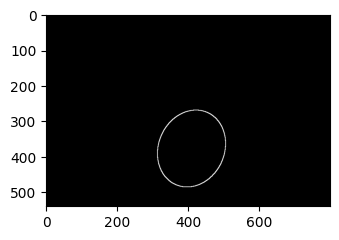

In [ ]:
fig = plt.figure(figsize = (30, 7))
file_path = os.path.join('/content/training_set', train_pixel_file.iloc[0, 0].replace('.png','_Annotation.png'))
  #print(file_path)
ax = fig.add_subplot(2, 7, 0+1)             ## annoted plot
plt.imshow(cv2.imread(file_path))
#img = cv2.imread(file_path)


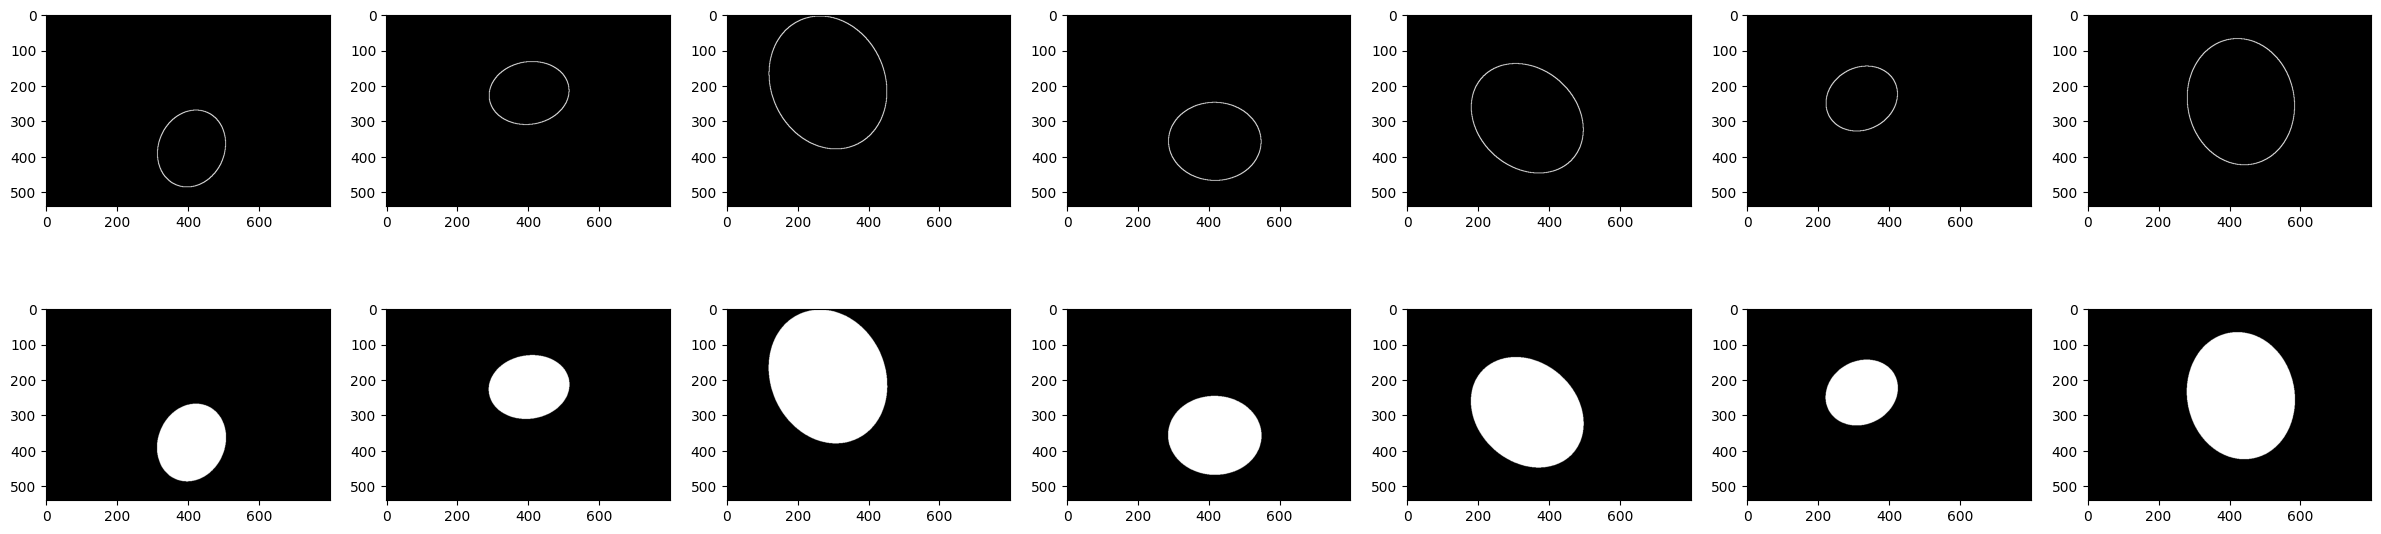

In [ ]:
# to check if our masking function is working correctly
import numpy as np
fig = plt.figure(figsize = (30,7))
for index in range(7):
  file_path = os.path.join('/content/training_set', train_pixel_file.iloc[index, 0].replace('.png','_Annotation.png'))
  #print(file_path)
  ax = fig.add_subplot(2, 7, index+1)             ## annoted plot
  plt.imshow(cv2.imread(file_path))
    
  ax = fig.add_subplot(2, 7, index+8)
  plt.imshow(masking(cv2.imread(file_path)))        ## mask plot

In [ ]:
# Here we loop through training set and  take annotations one by one and replace them with corresponding masks
for index in range(len(train_pixel_file)):
    file_path = os.path.join('/content/training_set', train_pixel_file.iloc[index, 0].replace('.png','_Annotation.png'))
    image = cv2.imread(file_path)
    mask = masking(image)
    cv2.imwrite(file_path, mask)

In [ ]:
!git clone https://github.com/MIC-DKFZ/nnUNet.git
%cd /content/nnUNet
!pip install -e .

Cloning into 'nnUNet'...
remote: Enumerating objects: 10514, done.
remote: Counting objects: 100% (911/911), done.
remote: Compressing objects: 100% (408/408), done.
remote: Total 10514 (delta 595), reused 750 (delta 502), pack-reused 9603
Receiving objects: 100% (10514/10514), 5.37 MiB | 22.61 MiB/s, done.
Resolving deltas: 100% (7996/7996), done.
/content/nnUNet
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/nnUNet
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7

In [ ]:
from batchgenerators.utilities.file_and_folder_operations import *
from nnunetv2.dataset_conversion.generate_dataset_json import generate_dataset_json
from multiprocessing import Pool
import numpy as np
import shutil
import SimpleITK as sitk
from skimage.io import imread, imsave
from skimage.color import rgb2gray

import multiprocessing

from nnunetv2.paths import nnUNet_raw
from skimage import io
from acvl_utils.morphology.morphology_helper import generic_filter_components
from scipy.ndimage import binary_fill_holes
import os
from pathlib import Path

nnUNet_raw is not defined and nnU-Net can only be used on data for which preprocessed files are already present on your system. nnU-Net cannot be used for experiment planning and preprocessing like this. If this is not intended, please read documentation/setting_up_paths.md for information on how to set this up properly.
nnUNet_preprocessed is not defined and nnU-Net can not be used for preprocessing or training. If this is not intended, please read documentation/setting_up_paths.md for information on how to set this up.
nnUNet_results is not defined and nnU-Net cannot be used for training or inference. If this is not intended behavior, please read documentation/setting_up_paths.md for information on how to set this up.


In [ ]:
nnUNet_raw="/content/dataset/nnUNet_raw"
nnUNet_preprocessed="/content/dataset/nnUNet_preprocessed"
nnUNet_results="/content/dataset/nnUNet_trained_models"

maybe_mkdir_p(nnUNet_raw)
maybe_mkdir_p(nnUNet_preprocessed)
maybe_mkdir_p(nnUNet_results)

os.environ["nnUNet_raw"] = "/content/dataset/nnUNet_raw"
os.environ["nnUNet_preprocessed"] = "/content/dataset/nnUNet_preprocessed"
os.environ["nnUNet_results"] = "/content/dataset/nnUNet_trained_model"

In [ ]:
# Arbitrary task id. This is just to ensure each dataset ha a unique number. Set this to whatever ([0-999]) you
# want
task_id = 750
task_name = "HC18"
foldername = "Dataset%03.0d_%s" % (task_id, task_name)

In [ ]:
def make_out_dirs(dataset_id: int, task_name="HC18"):
    dataset_name = f"Dataset{dataset_id:03d}_{task_name}"

    out_dir = Path(nnUNet_raw) / dataset_name
    out_train_dir = out_dir / "imagesTr"
    out_labels_dir = out_dir / "labelsTr"
    out_test_dir = out_dir / "imagesTs"

    os.makedirs(out_dir, exist_ok=True)
    os.makedirs(out_train_dir, exist_ok=True)
    os.makedirs(out_labels_dir, exist_ok=True)
    os.makedirs(out_test_dir, exist_ok=True)

    return out_dir, out_train_dir, out_labels_dir, out_test_dir

def convert_case(source_folder: str, case_identifier: str, voxel_spacing: float, images_folder: str,
                 labels_folder: str = None) -> None:
    image = imread(os.path.join(source_folder, case_identifier + '.png'))
    image_itk = sitk.GetImageFromArray(image[None])
    image_itk.SetSpacing((voxel_spacing, voxel_spacing, 999))
    sitk.WriteImage(image_itk, os.path.join(images_folder, case_identifier + '_0000.nii.gz'))

    if labels_folder is not None:
        annotation = imread(os.path.join(source_folder, case_identifier + '_Annotation.png'))
        annotation = rgb2gray(annotation)
        annotation[annotation > 0] = 1
        annotation = binary_fill_holes(annotation).astype(np.uint8)
        annotation_itk = sitk.GetImageFromArray(annotation[None])
        annotation_itk.SetSpacing((voxel_spacing, voxel_spacing, 999))
        sitk.WriteImage(annotation_itk, os.path.join(labels_folder, case_identifier + '.nii.gz'))

def copy_files(src_data_folder: Path, train_dir: Path, labels_dir: Path, test_dir: Path):
    """Copy files from the ACDC dataset to the nnUNet dataset folder."""
    p = Pool(18)
    r = []
    training_data_folder = '/content/training_set'
    training_data_csv = '/content/training_set_pixel_size_and_HC.csv'
    csv_content = np.loadtxt(training_data_csv, dtype=str, skiprows=1, delimiter=',')
    for filename, pixelsize, _ in csv_content:
        pixelsize = float(pixelsize)
        filename = filename[:-4]
        r.append(p.starmap_async(
            convert_case,
            ((training_data_folder, filename, pixelsize, train_dir, labels_dir),)
        ))
    _ = [i.get() for i in r]

    r = []
    test_data_folder = '/content/test_set'
    test_csv = '/content/test_set_pixel_size.csv'
    csv_content = np.loadtxt(test_csv, dtype=str, skiprows=1, delimiter=',')
    for filename, pixelsize in csv_content:
        pixelsize = float(pixelsize)
        filename = filename[:-4]
        r.append(p.starmap_async(
            convert_case,
            ((test_data_folder, filename, pixelsize, test_dir, None),)
        ))
    _ = [i.get() for i in r]


def convert_acdc(src_data_folder: str, dataset_id=27):
    out_dir, train_dir, labels_dir, test_dir = make_out_dirs(dataset_id=dataset_id)
    num_training_cases = copy_files(Path(src_data_folder), train_dir, labels_dir, test_dir)

    generate_dataset_json(
        str(out_dir),
        channel_names={
            0: "gray",
        },
        labels={
            "background": 0,
            "head": 1,
        },
        file_ending=".png",
        num_training_cases=num_training_cases,
    )


In [ ]:
out_dir, train_dir, labels_dir, test_dir = make_out_dirs(dataset_id=750, task_name="HC18")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
src_data_folder = '/content'
copy_files(Path(src_data_folder), train_dir, labels_dir, test_dir)


In [ ]:
generate_dataset_json(
        str(out_dir),
        channel_names={
            0: "gray",
        },
        labels={
            "background": 0,
            "head": 1,
        },
        file_ending=".nii.gz",
        num_training_cases=999,
    )

In [ ]:
!nnUNetv2_plan_and_preprocess -d 750 --verify_dataset_integrity

Fingerprint extraction...
Dataset750_HC18
Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################

Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer
100% 999/999 [00:35<00:00, 28.08it/s]
Experiment planning...
2D U-Net configuration:
{'data_identifier': 'nnUNetPlans_2d', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 13, 'patch_size': array([384, 640]), 'median_image_size_in_voxels': array([537., 780.]), 'spacing': array([0.12835725, 0.12835725]), 'normalization_schemes': ['ZScoreNormalization'], 'use_mask_for_norm': [False], 'UNet_class_name': 'PlainConvUNet', 'UNet_base_num_features': 32, 'n_conv_per_stage_encoder': (2, 2, 2, 2, 2, 2, 2), 'n_conv_per_stage_decoder': (2, 2, 2, 2, 2, 2), 'num_pool_per_axis': [6, 6], 'pool_op_kernel_sizes': [[1, 1], [2, 2], [2, 2],

In [ ]:
!nnUNetv2_train 750 2d 5

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################


This is the configuration used by this training:
Configuration name: 2d
 {'data_identifier': 'nnUNetPlans_2d', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 13, 'patch_size': [384, 640], 'median_image_size_in_voxels': [537.0, 780.0], 'spacing': [0.12835724651813507, 0.12835724651813507], 'normalization_schemes': ['ZScoreNormalization'], 'use_mask_for_norm': [False], 'UNet_class_name': 'PlainConvUNet', 'UNet_base_num_features': 32, 'n_conv_per_stage_encoder': [2, 2, 2, 2, 2, 2, 2], 'n_conv_per_stage_decoder': [2, 2, 2, 2, 2, 2], 'num_pool_per_axis': [6, 6], 